In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plta
figsize(11, 9)
import scipy.stats as stats

# Presentation:

Nous allons analyser l'impact des posters de batman

In [3]:
%matplotlib inline
import pymc3 as pm
import seaborn as sb

n = 1000 #donc 2000 personne en total , 1000 pour le groupe 1 eet 1000 pour le group 2

obs_v1 = 680 # vote pour le poster 1
obs_v2 = 700 # vote pour le poster 2

# Version Statiques Inferentielle

In [11]:
res_v1 = np.zeros(n)
res_v1[:obs_v1] = 1 

In [12]:
res_v2 = np.zeros(n)
res_v2[:obs_v2] = 1 

In [14]:
stats.ttest_ind(res_v1,res_v2)

Ttest_indResult(statistic=-0.9667048367247598, pvalue=0.3338086042871985)

p-value >0.05 ====>Not significant

# Version Bayesien

logp = -154.95, ||grad|| = 269.07: 100%|██████████| 7/7 [00:00<00:00, 2507.70it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [prior_v2]
>Metropolis: [prior_v1]
Sampling 2 chains: 100%|██████████| 101000/101000 [00:14<00:00, 7087.89draws/s]
The number of effective samples is smaller than 10% for some parameters.


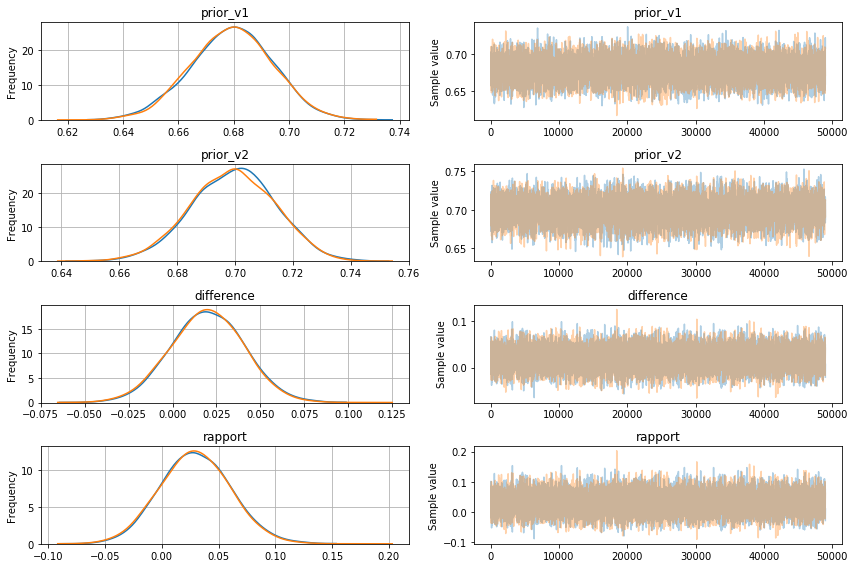

In [27]:
with pm.Model() as model: # context management
    # loi betha pour les paramètre du binomal , car c'est continue de [0,1]
    prior_v1 = pm.Beta('prior_v1', alpha=2, beta=2)
    prior_v2 = pm.Beta('prior_v2', alpha=2, beta=2)

    # binomial parce que  Voter ou Ne pas Voter les poster
    like_v1 = pm.Binomial('like_v1', n=n, p=prior_v1, observed=obs_v1)
    like_v2 = pm.Binomial('like_v2', n=n, p=prior_v2, observed=obs_v2)
    
    
    pm.Deterministic('difference', prior_v2 - prior_v1)
    pm.Deterministic('rapport', (prior_v2/prior_v1) - 1)
    
    trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)
_ = pm.traceplot(trace[1000:], grid=True)

à gauche la distribution , à droite les données générer

p1= centree 0.68

p2 =0.70

In [23]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
prior_v1,0.679447,0.014800,0.000155,0.649367,0.707252,11614.587190,1.000115
prior_v2,0.695961,0.014535,0.000130,0.668315,0.725119,12055.816948,0.999994
difference,0.016513,0.020794,0.000207,-0.024277,0.057106,11720.227148,1.000033
relation,0.024794,0.031050,0.000310,-0.035008,0.086576,11650.778649,1.000035


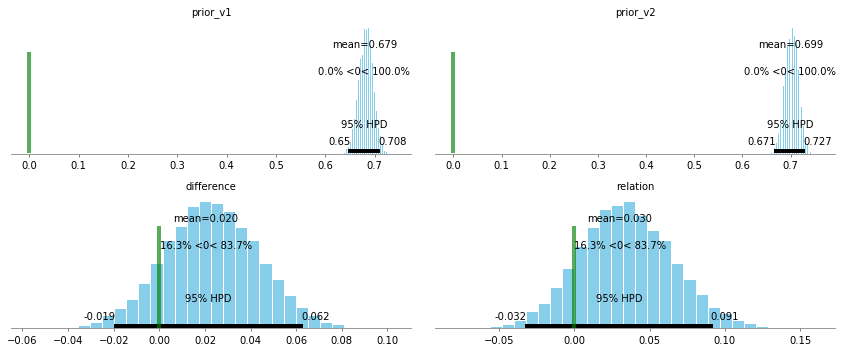

In [21]:
_ = pm.plot_posterior(trace[1000:], ref_val=0, color='#87ceeb')

HPD : higest posterior density

In [ ]:
95% des